In [1]:
import pandas as pd
pd.options.display.max_colwidth = 300
pd.options.display.max_columns = 300
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

DATA_DIR=Path("../data")
nm2mol = 1E9

In [2]:
df = pd.read_csv("C:/Users/rbachorz/Projects/qsarmodeler/qsarmodeler/notebooks/ar_homo_sapiens_chembl_3.3_more_ChEMBL_columnsEC50.csv")
df.head(2)

,comp_molregno,act_standard_units,act_standard_type,act_activity_comment,act_bao_endpoint,act_type,ass_assay_id,ass_description,ass_assay_type,ass_assay_category,ass_chembl_id,doc_doi,doc_pubmed_id,doc_chembl_id,doc_title,doc_doc_type,doc_abstract,doc_patent_id,coms_canonical_smiles,comp_full_molformula,mold_chembl_id,act_0,act_1,act_2,act_3,act_4,act_5,act_6,act_7,act_8,act_9,act_10,act_11,act_12,act_13,act_14,act_15,act_16,act_17,act_18,act_19,act_20,act_21,act_22,act_23,act_24,act_25
0,173,nM,EC50,NaN,BAO_0000188,EC50,941808,Agonist activity at androgen receptor (unknown origin) expressed in HeLa cells co-expressing PSA-(ARE)4-Luc13 assessed as induction of DHT-induced luciferase activity after 20 mins by luciferase reporter gene assay,B,NaN,CHEMBL2329799,10.1021/jm3017656,23432095,CHEMBL2321830,Development of potent and selective indomethacin analogues for the inhibition of AKR1C3 (Type 5 17β-hydroxysteroid dehydrogenase/prostaglandin F synthase) in castrate-resistant prostate cancer.,PUBLICATION,"Castrate-resistant prostate cancer (CRPC) is a fatal, metastatic form of prostate cancer. CRPC is characterized by reactivation of the androgen axis due to changes in androgen receptor signaling and/or adaptive intratumoral androgen biosynthesis. AKR1C3 is upregulated in CRPC where it catalyzes ...",NaN,COc1ccc2c(c1)c(CC(=O)O)c(C)n2C(=O)c1ccc(Cl)cc1,C19H16ClNO4,CHEMBL6,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,716,nM,EC50,NaN,BAO_0000188,EC50,35936,In vitro agonistic activity against human androgen receptor using cotransfection assay in CV-1 cells.,F,NaN,CHEMBL646844,10.1016/s0960-894x(99)00118-3,10230628,CHEMBL1132082,"Nonsteroidal androgen receptor agonists based on 4-(trifluoromethyl)-2H-pyrano[3,2-g]quinolin-2-one.",PUBLICATION,"A series of 2H-pyrano[3,2-g]quinolin-2-ones was prepared and tested for the ability to modulate the transcriptional activity of the human androgen receptor (hAR). The parent compound, 4-(trifluoromethyl)-2H-pyrano[3,2-g]quinolin-2-one, displayed moderate interaction with hAR, but substituted ana...",NaN,CCC1CCNc2cc3oc(=O)cc(C(F)(F)F)c3cc21,C15H14F3NO2,CHEMBL6843,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df["coms_canonical_smiles"]

0                                           COc1ccc2c(c1)c(CC(=O)O)c(C)n2C(=O)c1ccc(Cl)cc1
1                                                     CCC1CCNc2cc3oc(=O)cc(C(F)(F)F)c3cc21
2                                CC(O)(CS(=O)(=O)c1ccc(F)cc1)C(=O)Nc1ccc(C#N)c(C(F)(F)F)c1
3                                                     CCC1CCc2cc3c(C(F)(F)F)cc(=O)oc3cc2N1
4                                                   CC1(C)CCc2cc3c(C(F)(F)F)cc(=O)oc3cc2N1
                                              ...                                         
659                   C[C@@H]1CC2=CC(=O)CC[C@@H]2[C@H]2CC[C@]3(C)[C@@H](O)CC[C@H]3[C@@H]21
660                                    O=C1COc2c(Cl)cc(Cl)cc2C(C(=O)Nc2ccc(C(F)(F)F)cc2)N1
661    CCCCCCCCC(=O)O[C@H]1CC[C@H]2[C@H]3[C@H]([C@@H](C)C[C@]12C)[C@H]1CCC(=O)C=C1C[C@H]3C
662                                   Cc1cc(Cl)cc2c1OCC(=O)NC2C(=O)Nc1ccc([N+](=O)[O-])cc1
663                                        C[C@](O)(CCOc1ccc(F)cc1)C(=O)N1CCc2c(C#N)cccc21

In [5]:
max_act = 25
act_cols = ["act_"+str(item) for item in range(max_act)]
df["act_std"] = df[act_cols].apply(lambda x: np.std(x), axis=1)
df["act_min"] = df[act_cols].apply(lambda x: np.min(x), axis=1)
df = df[df["act_min"] > 0]
df["act_mean"] = df[act_cols].apply(lambda x: np.mean(x), axis=1)
df = df[df["act_mean"] > 0]
df["act_median"] = df[act_cols].apply(lambda x: np.nanmedian(x), axis=1)
df["act_max"] = df[act_cols].apply(lambda x: np.max(x), axis=1)
df["log_act_mean"] = df[act_cols].apply(lambda x: np.log10(np.mean(x)), axis=1)
df["log_act_median"] = df[act_cols].apply(lambda x: np.log10(np.nanmedian(x)), axis=1)
df["log_act_min"] = df[act_cols].apply(lambda x: np.log10(np.min(x)), axis=1)
df["pEC50_mean"] = df[act_cols].apply(lambda x: -1.0*np.log10(np.mean(x) / nm2mol), axis=1)
df["pEC50_median"] = df[act_cols].apply(lambda x: -1.0*np.log10(np.nanmedian(x) / nm2mol), axis=1)
df["pEC50_min"] = df[act_cols].apply(lambda x: -1.0*np.log10(np.min(x) / nm2mol), axis=1)
df["meas_count"] = df[act_cols].apply(lambda x: max_act-np.sum(np.isnan(x)), axis=1)
df.head(2)

,comp_molregno,act_standard_units,act_standard_type,act_activity_comment,act_bao_endpoint,act_type,ass_assay_id,ass_description,ass_assay_type,ass_assay_category,ass_chembl_id,doc_doi,doc_pubmed_id,doc_chembl_id,doc_title,doc_doc_type,doc_abstract,doc_patent_id,coms_canonical_smiles,comp_full_molformula,mold_chembl_id,act_0,act_1,act_2,act_3,act_4,act_5,act_6,act_7,act_8,act_9,act_10,act_11,act_12,act_13,act_14,act_15,act_16,act_17,act_18,act_19,act_20,act_21,act_22,act_23,act_24,act_25,act_std,act_min,act_mean,act_median,act_max,log_act_mean,log_act_median,log_act_min,pEC50_mean,pEC50_median,pEC50_min,meas_count
0,173,nM,EC50,NaN,BAO_0000188,EC50,941808,Agonist activity at androgen receptor (unknown origin) expressed in HeLa cells co-expressing PSA-(ARE)4-Luc13 assessed as induction of DHT-induced luciferase activity after 20 mins by luciferase reporter gene assay,B,NaN,CHEMBL2329799,10.1021/jm3017656,23432095,CHEMBL2321830,Development of potent and selective indomethacin analogues for the inhibition of AKR1C3 (Type 5 17β-hydroxysteroid dehydrogenase/prostaglandin F synthase) in castrate-resistant prostate cancer.,PUBLICATION,"Castrate-resistant prostate cancer (CRPC) is a fatal, metastatic form of prostate cancer. CRPC is characterized by reactivation of the androgen axis due to changes in androgen receptor signaling and/or adaptive intratumoral androgen biosynthesis. AKR1C3 is upregulated in CRPC where it catalyzes ...",NaN,COc1ccc2c(c1)c(CC(=O)O)c(C)n2C(=O)c1ccc(Cl)cc1,C19H16ClNO4,CHEMBL6,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.14,0.14,0.14,0.14,-0.853872,-0.853872,-0.853872,9.853872,9.853872,9.853872,1
1,716,nM,EC50,NaN,BAO_0000188,EC50,35936,In vitro agonistic activity against human androgen receptor using cotransfection assay in CV-1 cells.,F,NaN,CHEMBL646844,10.1016/s0960-894x(99)00118-3,10230628,CHEMBL1132082,"Nonsteroidal androgen receptor agonists based on 4-(trifluoromethyl)-2H-pyrano[3,2-g]quinolin-2-one.",PUBLICATION,"A series of 2H-pyrano[3,2-g]quinolin-2-ones was prepared and tested for the ability to modulate the transcriptional activity of the human androgen receptor (hAR). The parent compound, 4-(trifluoromethyl)-2H-pyrano[3,2-g]quinolin-2-one, displayed moderate interaction with hAR, but substituted ana...",NaN,CCC1CCNc2cc3oc(=O)cc(C(F)(F)F)c3cc21,C15H14F3NO2,CHEMBL6843,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.00,2.00,2.00,2.00,0.301030,0.301030,0.301030,8.698970,8.698970,8.698970,1


<Axes: >

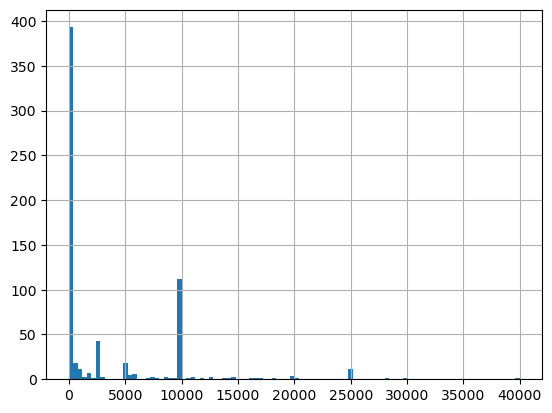

In [6]:
df["act_mean"].hist(bins=100)

Text(0.5, 1.0, 'Conflicting EC50 values')

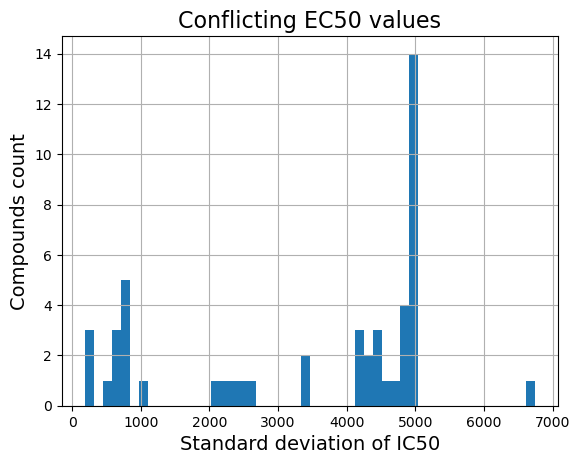

In [8]:
data = df[df["act_std"] > 100]["act_std"]
plt.hist(data, bins=50)
plt.grid()
plt.xlabel("Standard deviation of IC50", fontsize=14)
plt.ylabel("Compounds count", fontsize=14)
plt.title("Conflicting EC50 values", fontsize=16)
# plt.savefig("C:\\Users\\rbachorz\\Projects\\rorgammaaidd\\presentation\\IC50_std_distribution.svg", dpi=200)

In [9]:
df.shape[0]/data.shape[0]

13.551020408163266

In [10]:
# def median_incorporate_expert(x, n_acts=15, aqa_position=15):
#     aqa_position = 15
#     if x[aqa_position] == "all bad": 
#         return None
#     n_available_acts = n_acts - x[:n_acts].isna().sum()
#     if n_available_acts == 1:
#         return x[0]
#     elif n_available_acts > 1:
#         if pd.isna(x[aqa_position]):
#             return np.nanmedian(x[:n_acts])
#         else:
#             valueable_activities = x.iloc[x[aqa_position].split(";")]
#             return np.nanmedian(valueable_activities)
#     elif n_available_acts < 1:
#         raise NotImplementedError
    
# def mean_incorporate_expert(x, n_acts=15, aqa_position=15):
#     aqa_position = 15
#     if x[aqa_position] == "all bad": 
#         return None
#     n_available_acts = n_acts - x[:n_acts].isna().sum()
#     if n_available_acts == 1:
#         return x[0]
#     elif n_available_acts > 1:
#         if pd.isna(x[aqa_position]):
#             return np.mean(x[:n_acts])
#         else:
#             valueable_activities = x.iloc[x[aqa_position].split(";")]
#             return np.mean(valueable_activities)
#     elif n_available_acts < 1:
#         raise NotImplementedError

# def min_incorporate_expert(x, n_acts=15, aqa_position=15):
#     aqa_position = 15
#     if x[aqa_position] == "all bad": 
#         return None
#     n_available_acts = n_acts - x[:n_acts].isna().sum()
#     if n_available_acts == 1:
#         return x[0]
#     elif n_available_acts > 1:
#         if pd.isna(x[aqa_position]):
#             return np.min(x[:n_acts])
#         else:
#             valueable_activities = x.iloc[x[aqa_position].split(";")]
#             return np.min(valueable_activities)
#     elif n_available_acts < 1:
#         raise NotImplementedError 

In [11]:
# df["act_mean_expert"] = df[act_cols+["Qualitative assay assessment"]].apply(mean_incorporate_expert, axis=1)
# df["act_median_expert"] = df[act_cols+["Qualitative assay assessment"]].apply(median_incorporate_expert, axis=1)
# df["act_min_expert"] = df[act_cols+["Qualitative assay assessment"]].apply(min_incorporate_expert, axis=1)

# df["pIC50_mean_expert"] = df["act_mean_expert"].apply(lambda x: -1.0*np.log10(x/nm2mol))
# df["pIC50_median_expert"] = df["act_median_expert"].apply(lambda x: -1.0*np.log10(x/nm2mol))
# df["pIC50_min_expert"] = df["act_min_expert"].apply(lambda x: -1.0*np.log10(x/nm2mol))

In [12]:
activity_thresholds = [1000, 2000, 3000, 4000, 5000]
for at in activity_thresholds:
    df["class_activity_mean_"+str(at)] = df["act_mean"].apply(lambda x: "ACTIVE" if x < at else "INACTIVE")
    # df["class_activity_mean_expert_"+str(at)] = df["act_mean_expert"].apply(lambda x: "ACTIVE" if x < at else "INACTIVE")

    df["class_activity_median_"+str(at)] = df["act_median"].apply(lambda x: "ACTIVE" if x < at else "INACTIVE")
    # df["class_activity_median_expert_"+str(at)] = df["act_median_expert"].apply(lambda x: "ACTIVE" if x < at else "INACTIVE")

    df["class_activity_min_"+str(at)] = df["act_min"].apply(lambda x: "ACTIVE" if x < at else "INACTIVE")
    # df["class_activity_min_expert_"+str(at)] = df["act_min_expert"].apply(lambda x: "ACTIVE" if x < at else "INACTIVE")

    df["class_activity_max_"+str(at)] = df["act_max"].apply(lambda x: "ACTIVE" if x < at else "INACTIVE")
    # df["class_activity_min_expert_"+str(at)] = df["act_min_expert"].apply(lambda x: "ACTIVE" if x < at else "INACTIVE")

In [13]:
df

,comp_molregno,act_standard_units,act_standard_type,act_activity_comment,act_bao_endpoint,act_type,ass_assay_id,ass_description,ass_assay_type,ass_assay_category,ass_chembl_id,doc_doi,doc_pubmed_id,doc_chembl_id,doc_title,doc_doc_type,doc_abstract,doc_patent_id,coms_canonical_smiles,comp_full_molformula,mold_chembl_id,act_0,act_1,act_2,act_3,act_4,act_5,act_6,act_7,act_8,act_9,act_10,act_11,act_12,act_13,act_14,act_15,act_16,act_17,act_18,act_19,act_20,act_21,act_22,act_23,act_24,act_25,act_std,act_min,act_mean,act_median,act_max,log_act_mean,log_act_median,log_act_min,pEC50_mean,pEC50_median,pEC50_min,meas_count,class_activity_mean_1000,class_activity_median_1000,class_activity_min_1000,class_activity_max_1000,class_activity_mean_2000,class_activity_median_2000,class_activity_min_2000,class_activity_max_2000,class_activity_mean_3000,class_activity_median_3000,class_activity_min_3000,class_activity_max_3000,class_activity_mean_4000,class_activity_median_4000,class_activity_min_4000,class_activity_max_4000,class_activity_mean_5000,class_activity_median_5000,class_activity_min_5000,class_activity_max_5000
0,173,nM,EC50,NaN,BAO_0000188,EC50,941808,Agonist activity at androgen receptor (unknown origin) expressed in HeLa cells co-expressing PSA-(ARE)4-Luc13 assessed as induction of DHT-induced luciferase activity after 20 mins by luciferase reporter gene assay,B,NaN,CHEMBL2329799,10.1021/jm3017656,23432095,CHEMBL2321830,Development of potent and selective indomethacin analogues for the inhibition of AKR1C3 (Type 5 17β-hydroxysteroid dehydrogenase/prostaglandin F synthase) in castrate-resistant prostate cancer.,PUBLICATION,"Castrate-resistant prostate cancer (CRPC) is a fatal, metastatic form of prostate cancer. CRPC is characterized by reactivation of the androgen axis due to changes in androgen receptor signaling and/or adaptive intratumoral androgen biosynthesis. AKR1C3 is upregulated in CRPC where it catalyzes ...",NaN,COc1ccc2c(c1)c(CC(=O)O)c(C)n2C(=O)c1ccc(Cl)cc1,C19H16ClNO4,CHEMBL6,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.14,0.140000,0.14,0.14,-0.853872,-0.853872,-0.853872,9.853872,9.853872,9.853872,1,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE
1,716,nM,EC50,NaN,BAO_0000188,EC50,35936,In vitro agonistic activity against human androgen receptor using cotransfection assay in CV-1 cells.,F,NaN,CHEMBL646844,10.1016/s0960-894x(99)00118-3,10230628,CHEMBL1132082,"Nonsteroidal androgen receptor agonists based on 4-(trifluoromethyl)-2H-pyrano[3,2-g]quinolin-2-one.",PUBLICATION,"A series of 2H-pyrano[3,2-g]quinolin-2-ones was prepared and tested for the ability to modulate the transcriptional activity of the human androgen receptor (hAR). The parent compound, 4-(trifluoromethyl)-2H-pyrano[3,2-g]quinolin-2-one, displayed moderate interaction with hAR, but substituted ana...",NaN,CCC1CCNc2cc3oc(=O)cc(C(F)(F)F)c3cc21,C15H14F3NO2,CHEMBL6843,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,2.00,2.000000,2.00,2.00,0.301030,0.301030,0.301030,8.698970,8.698970,8.698970,1,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE
2,717,nM,EC50,NaN,"Entry 0: BAO_0000188, Entry 1: BAO_0000188, Entry 2: BAO_0000188, Entry 3: BAO_0000188, Entry 4: BAO_0000188, Entry 5: BAO_0000188, Entry 6: BAO_0000188, Entry 7: BAO_0000188, Entry 8: BAO_0000188, Entry 9: BAO_0000188, Entry 10: BAO_0000188, Entry 11: BAO_0000188, Entry 12: BAO_0000188,",EC50,"Entry 0: 35937, Entry 1: 467614, Entry 2: 805652, Entry 3: 805653, Entry 4: 796602, Entry 5: 796603, Entry 6: 796604, Entry 7: 944548, Entry 8: 944549, Entry 9: 964272, Entry 10: 964273, Entry 11: 1473767, Entry 12: 1473768,","Entry 0: In vitro antagonistic activity against human androgen receptor (

In [14]:
df.columns

Index(['comp_molregno', 'act_standard_units', 'act_standard_type',
       'act_activity_comment', 'act_bao_endpoint', 'act_type', 'ass_assay_id',
       'ass_description', 'ass_assay_type', 'ass_assay_category',
       'ass_chembl_id', 'doc_doi', 'doc_pubmed_id', 'doc_chembl_id',
       'doc_title', 'doc_doc_type', 'doc_abstract', 'doc_patent_id',
       'coms_canonical_smiles', 'comp_full_molformula', 'mold_chembl_id',
       'act_0', 'act_1', 'act_2', 'act_3', 'act_4', 'act_5', 'act_6', 'act_7',
       'act_8', 'act_9', 'act_10', 'act_11', 'act_12', 'act_13', 'act_14',
       'act_15', 'act_16', 'act_17', 'act_18', 'act_19', 'act_20', 'act_21',
       'act_22', 'act_23', 'act_24', 'act_25', 'act_std', 'act_min',
       'act_mean', 'act_median', 'act_max', 'log_act_mean', 'log_act_median',
       'log_act_min', 'pEC50_mean', 'pEC50_median', 'pEC50_min', 'meas_count',
       'class_activity_mean_1000', 'class_activity_median_1000',
       'class_activity_min_1000', 'class_activity_max_

In [15]:
df[(df["doc_doc_type"]=="DATASET") & (df["ass_chembl_id"]=="CHEMBL2114928")]#["ass_chembl_id"].unique()

,comp_molregno,act_standard_units,act_standard_type,act_activity_comment,act_bao_endpoint,act_type,ass_assay_id,ass_description,ass_assay_type,ass_assay_category,ass_chembl_id,doc_doi,doc_pubmed_id,doc_chembl_id,doc_title,doc_doc_type,doc_abstract,doc_patent_id,coms_canonical_smiles,comp_full_molformula,mold_chembl_id,act_0,act_1,act_2,act_3,act_4,act_5,act_6,act_7,act_8,act_9,act_10,act_11,act_12,act_13,act_14,act_15,act_16,act_17,act_18,act_19,act_20,act_21,act_22,act_23,act_24,act_25,act_std,act_min,act_mean,act_median,act_max,log_act_mean,log_act_median,log_act_min,pEC50_mean,pEC50_median,pEC50_min,meas_count,class_activity_mean_1000,class_activity_median_1000,class_activity_min_1000,class_activity_max_1000,class_activity_mean_2000,class_activity_median_2000,class_activity_min_2000,class_activity_max_2000,class_activity_mean_3000,class_activity_median_3000,class_activity_min_3000,class_activity_max_3000,class_activity_mean_4000,class_activity_median_4000,class_activity_min_4000,class_activity_max_4000,class_activity_mean_5000,class_activity_median_5000,class_activity_min_5000,class_activity_max_5000


In [16]:
df.head(1)

,comp_molregno,act_standard_units,act_standard_type,act_activity_comment,act_bao_endpoint,act_type,ass_assay_id,ass_description,ass_assay_type,ass_assay_category,ass_chembl_id,doc_doi,doc_pubmed_id,doc_chembl_id,doc_title,doc_doc_type,doc_abstract,doc_patent_id,coms_canonical_smiles,comp_full_molformula,mold_chembl_id,act_0,act_1,act_2,act_3,act_4,act_5,act_6,act_7,act_8,act_9,act_10,act_11,act_12,act_13,act_14,act_15,act_16,act_17,act_18,act_19,act_20,act_21,act_22,act_23,act_24,act_25,act_std,act_min,act_mean,act_median,act_max,log_act_mean,log_act_median,log_act_min,pEC50_mean,pEC50_median,pEC50_min,meas_count,class_activity_mean_1000,class_activity_median_1000,class_activity_min_1000,class_activity_max_1000,class_activity_mean_2000,class_activity_median_2000,class_activity_min_2000,class_activity_max_2000,class_activity_mean_3000,class_activity_median_3000,class_activity_min_3000,class_activity_max_3000,class_activity_mean_4000,class_activity_median_4000,class_activity_min_4000,class_activity_max_4000,class_activity_mean_5000,class_activity_median_5000,class_activity_min_5000,class_activity_max_5000
0,173,nM,EC50,NaN,BAO_0000188,EC50,941808,Agonist activity at androgen receptor (unknown origin) expressed in HeLa cells co-expressing PSA-(ARE)4-Luc13 assessed as induction of DHT-induced luciferase activity after 20 mins by luciferase reporter gene assay,B,NaN,CHEMBL2329799,10.1021/jm3017656,23432095,CHEMBL2321830,Development of potent and selective indomethacin analogues for the inhibition of AKR1C3 (Type 5 17β-hydroxysteroid dehydrogenase/prostaglandin F synthase) in castrate-resistant prostate cancer.,PUBLICATION,"Castrate-resistant prostate cancer (CRPC) is a fatal, metastatic form of prostate cancer. CRPC is characterized by reactivation of the androgen axis due to changes in androgen receptor signaling and/or adaptive intratumoral androgen biosynthesis. AKR1C3 is upregulated in CRPC where it catalyzes ...",NaN,COc1ccc2c(c1)c(CC(=O)O)c(C)n2C(=O)c1ccc(Cl)cc1,C19H16ClNO4,CHEMBL6,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.14,0.14,0.14,0.14,-0.853872,-0.853872,-0.853872,9.853872,9.853872,9.853872,1,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE


<Axes: >

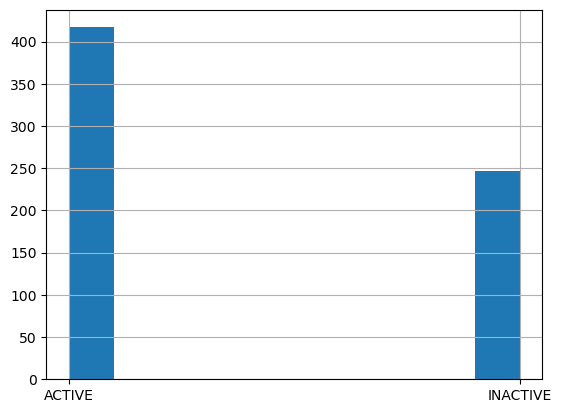

In [17]:
df["class_activity_median_1000"].hist()

In [18]:
df.to_csv(DATA_DIR/"processed"/"ar_homo_sapiens_chembl_3.3_more_ChEMBL_columnsEC50.csv_processed.csv", sep=",", index=False)

In [17]:
DATA_DIR

WindowsPath('../data')